In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
# Load data
df = pd.read_csv("country-data (1).csv")  
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

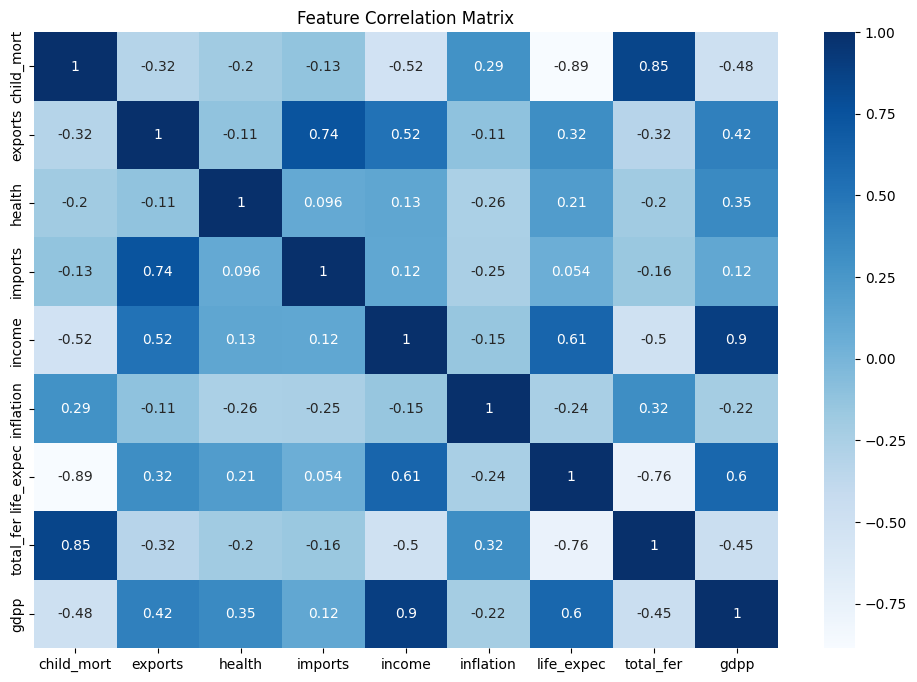

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix")
plt.show()

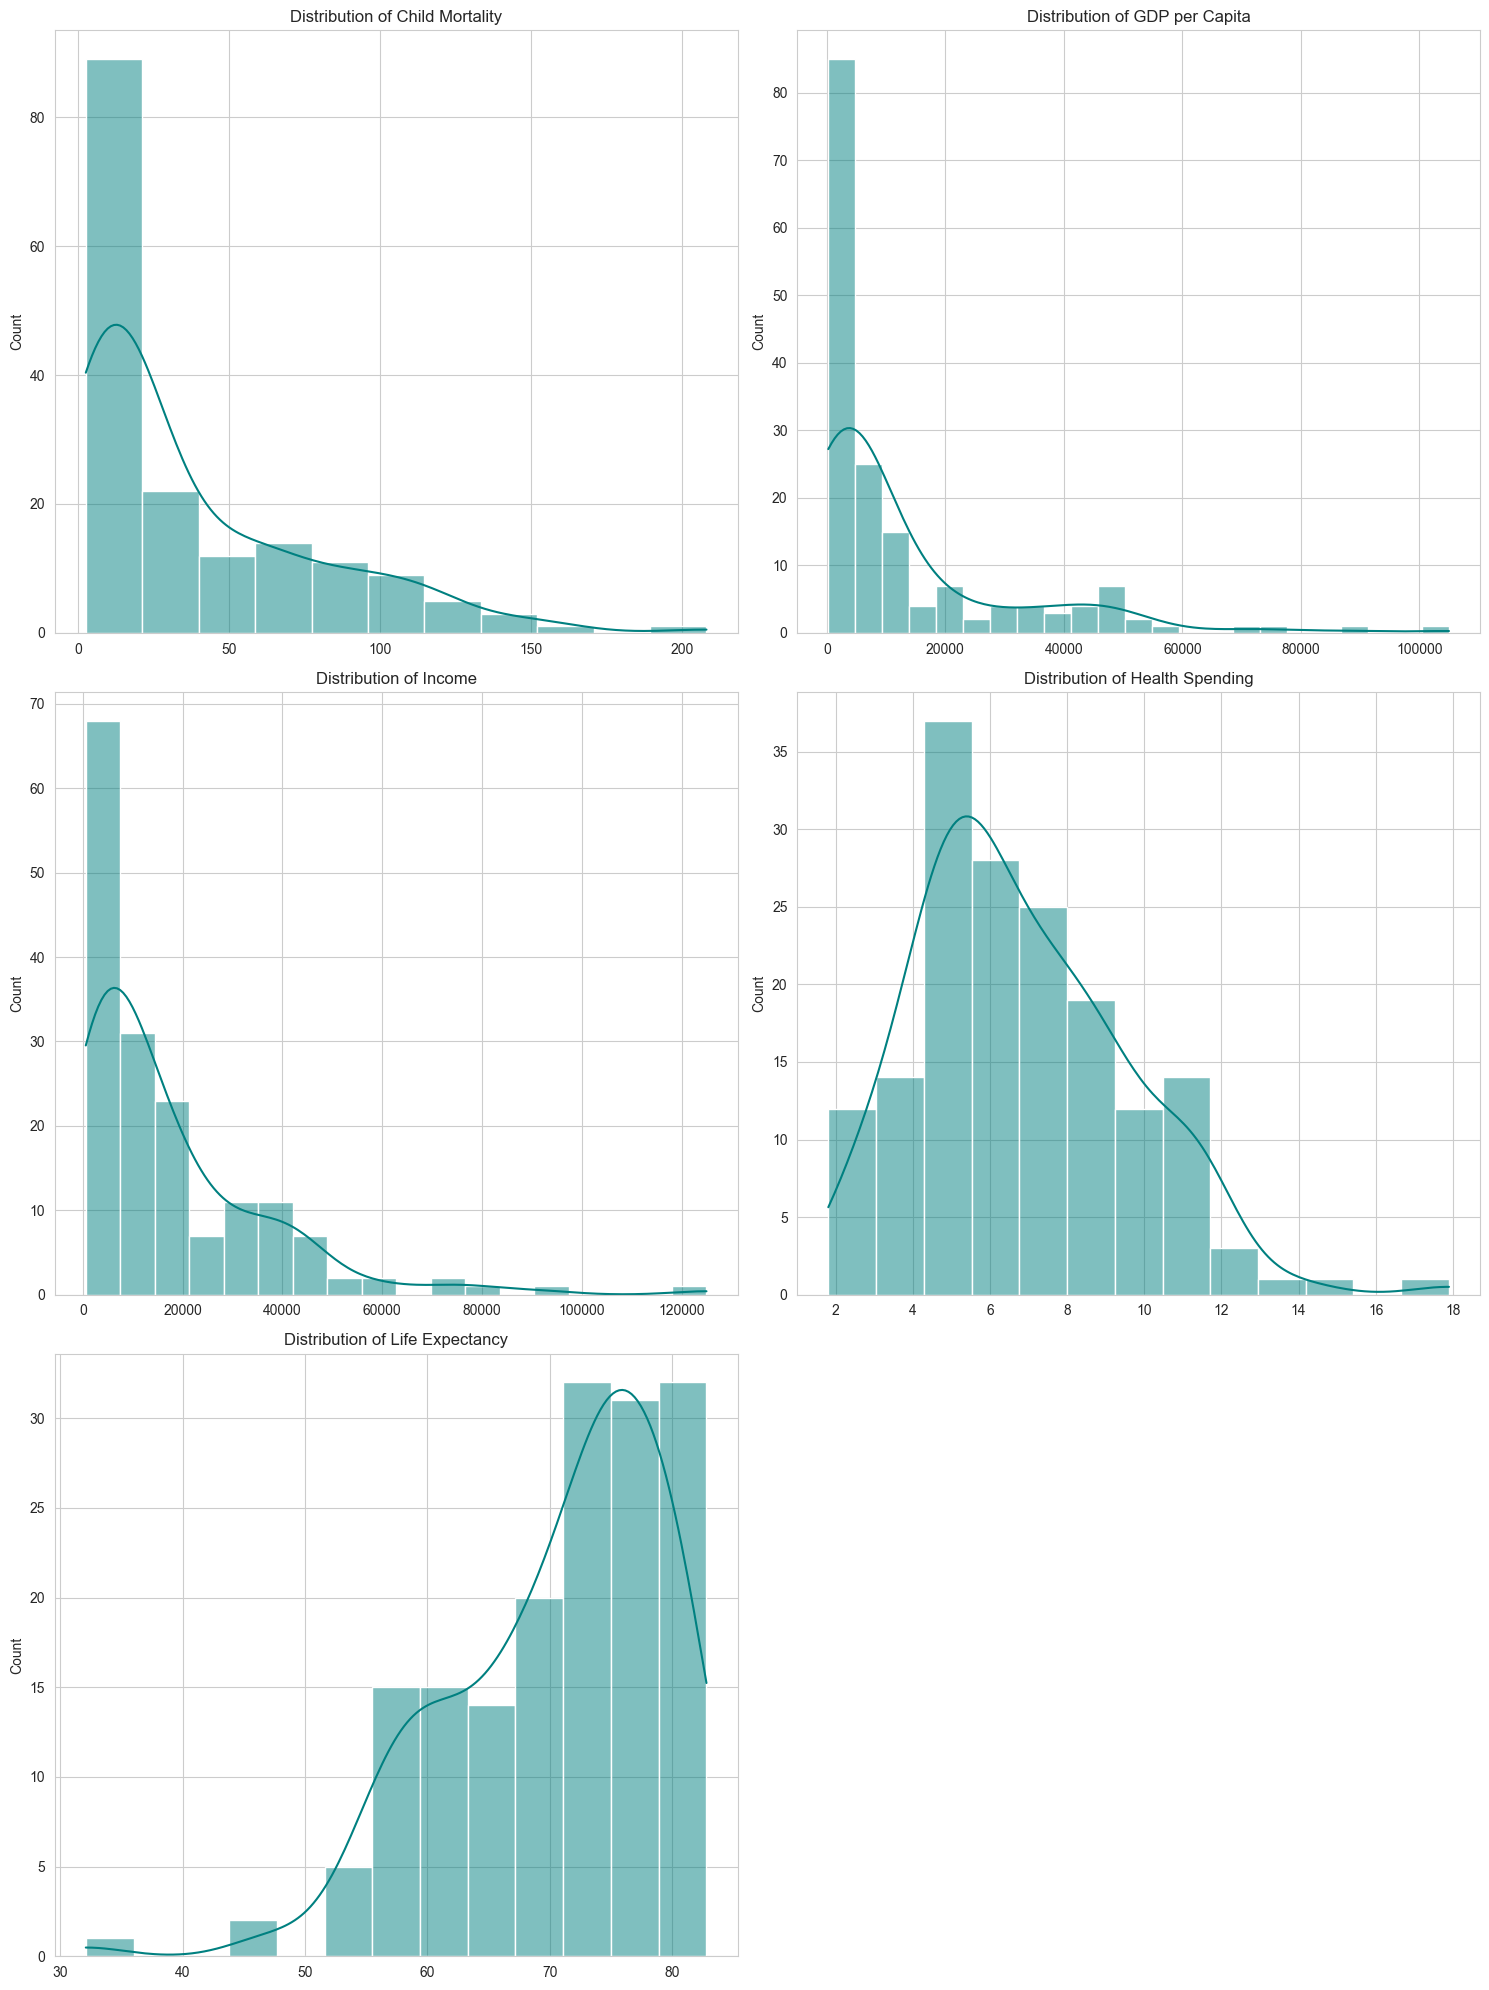

In [7]:
# Set up visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 20))

# Create subplots for key features
features = ['child_mort', 'gdpp', 'income', 'health', 'life_expec']
titles = ['Child Mortality', 'GDP per Capita', 'Income', 'Health Spending', 'Life Expectancy']

for i, (col, title) in enumerate(zip(features, titles)):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {title}')
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

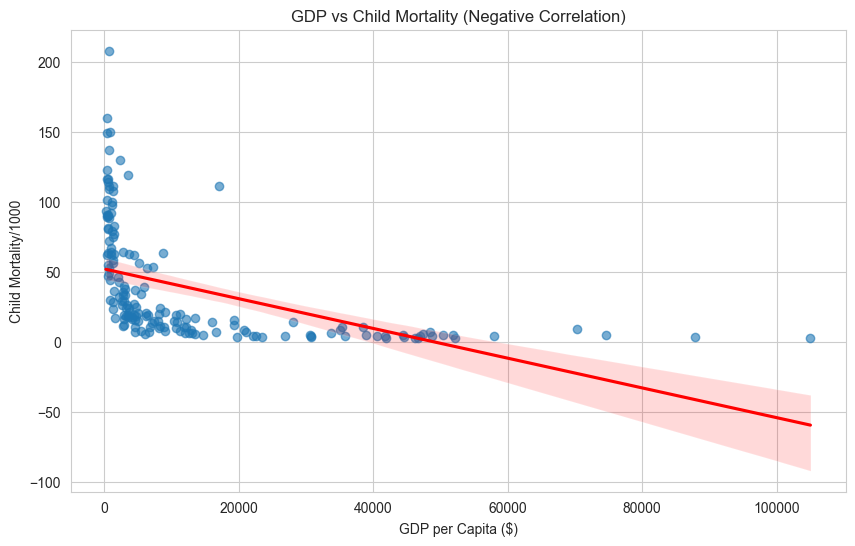

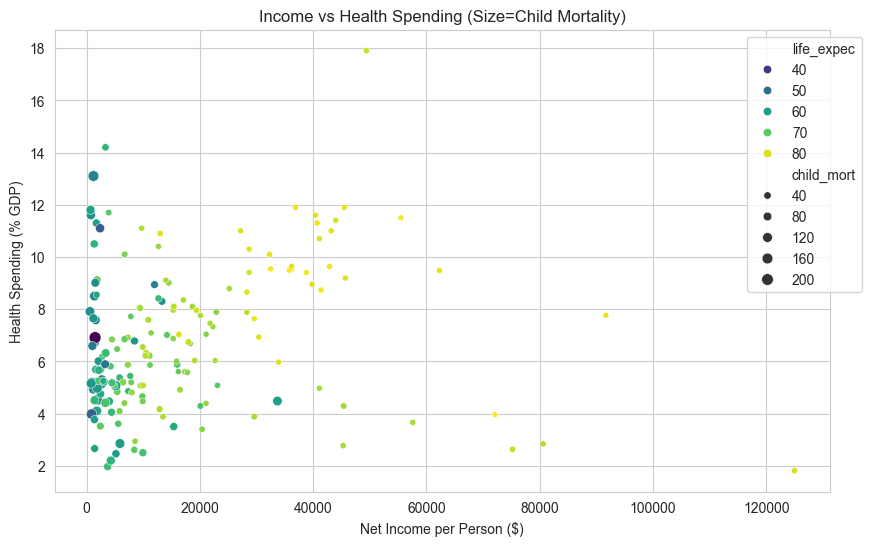

In [8]:
# GDP vs Child Mortality
plt.figure(figsize=(10, 6))
sns.regplot(x='gdpp', y='child_mort', data=df, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("GDP vs Child Mortality (Negative Correlation)")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Child Mortality/1000")
plt.show()

# Income vs Health Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='health', data=df, 
               hue='life_expec', palette='viridis', size='child_mort')
plt.title("Income vs Health Spending (Size=Child Mortality)")
plt.xlabel("Net Income per Person ($)")
plt.ylabel("Health Spending (% GDP)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

WHY USE PCA? 

We use PCA to reduce the dimensions of the data to 2-Dimensions so it can be mapped graphically 

This will convert our 9 dimensions of data to 2 dimensions 

In [9]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])  # Exclude country name

# Dimensionality reduction with PCA
pca = PCA(n_components=2) # Step 1: Create a PCA model to reduce data to 2 components
principal_components = pca.fit_transform(scaled_data) # Step 2: Fit PCA and transform the data
df_pca = pd.DataFrame(principal_components, 
                     columns=['PC1', 'PC2'], # Step 3: Create a DataFrame with principal components
                     index=df.index)

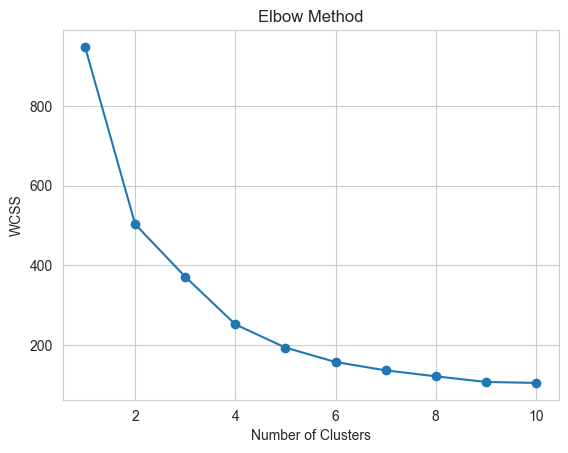

In [10]:
# Elbow method for optimal clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



In [11]:
# Apply K-Means (assuming 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [12]:
# Get the PCA components (loadings)
loadings = pca.components_

# Make sure the columns refer to the correct number of features
loadings_df = pd.DataFrame(loadings, columns=df.columns[1:1+loadings.shape[1]], index=['PC1', 'PC2'])

# Display the loadings
print(loadings_df)



     child_mort   exports    health   imports    income  inflation  \
PC1   -0.419519  0.283897  0.150838  0.161482  0.398441  -0.193173   
PC2    0.192884  0.613163 -0.243087  0.671821  0.022536  -0.008404   

     life_expec  total_fer      gdpp  
PC1    0.425839  -0.403729  0.392645  
PC2   -0.222707   0.155233 -0.046022  


In [13]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)

Explained Variance Ratio:
 [0.4595174  0.17181626]


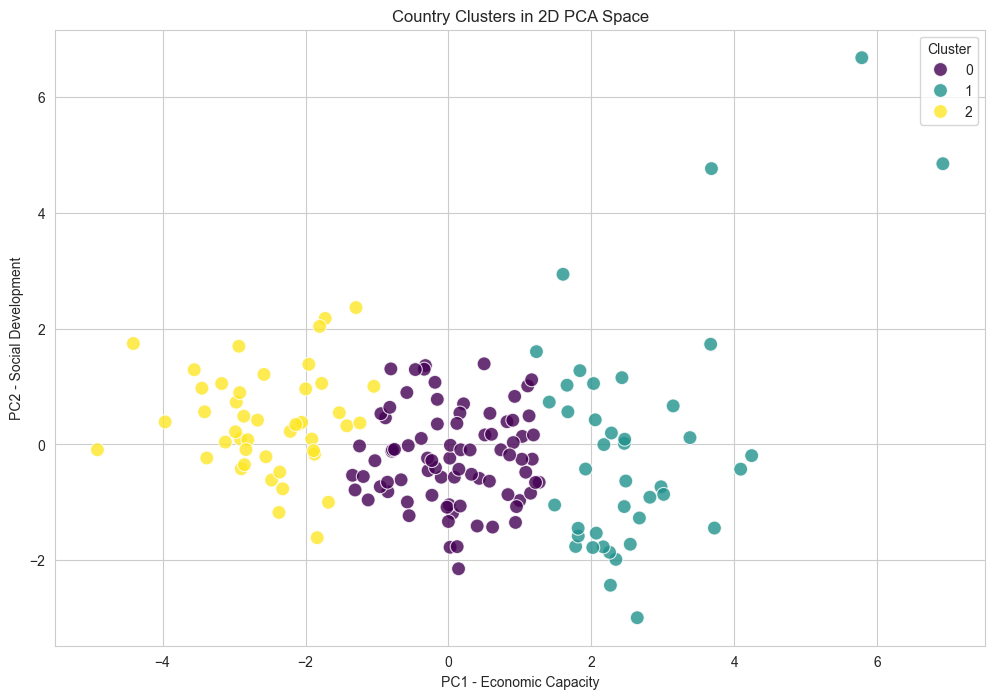

Priority Countries:
 66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object


In [14]:
# PCA visualization
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], 
                hue=df['Cluster'], palette='viridis',
                s=100, alpha=0.8)
plt.title("Country Clusters in 2D PCA Space")
plt.xlabel("PC1 - Economic Capacity")
plt.ylabel("PC2 - Social Development")
plt.show()

# Top 10 countries needing help
need_help = df[df['Cluster'] == 2].sort_values(by=['child_mort', 'gdpp'], 
                                              ascending=[False, True])
print("Priority Countries:\n", need_help['country'].head(10))